<a href="https://colab.research.google.com/github/iasad1/topic_analyser/blob/main/topic_analyser_svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
# from sklearn.datasets import fetch_20newsgroup
import matplotlib.pyplot as plt
%matplotlib inline

## About 20newsgroup

Scikit Learn comes with a number of built-in datasets, as well as loading utilities to load several standard external datasets. This is a great resource, and the datasets include Boston housing prices, face images, patches of forest, diabetes, breast cancer, and more. We will be using the newsgroups dataset.

Newsgroups are discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off. This dataset includes 18,000 newsgroups posts with 20 topics.

## Importing 20newsgroup data


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Data Exploration

In [ ]:
# ?fetch_20newsgroups

In [ ]:
exp_newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
from pprint import pprint
pprint(list(exp_newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

In [ ]:
remove = ('headers','footers','quotes')

In [ ]:
newsgroups_train =fetch_20newsgroups(subset='train',categories=categories,remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test',categories=categories,remove=remove)

In [ ]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [ ]:
type(newsgroups_train)

sklearn.utils.Bunch

In [ ]:
pprint(newsgroups_train.data[:3])

['Hi,\n'
 '\n'
 "I've noticed that if you only save a model (with all your mapping planes\n"
 'positioned carefully) to a .3DS file that when you reload it after '
 'restarting\n'
 '3DS, they are given a default position and orientation.  But if you save\n'
 'to a .PRJ file their positions/orientation are preserved.  Does anyone\n'
 'know why this information is not stored in the .3DS file?  Nothing is\n'
 'explicitly said in the manual about saving texture rules in the .PRJ file. \n'
 "I'd like to be able to read the texture rule information, does anyone have \n"
 'the format for the .PRJ file?\n'
 '\n'
 'Is the .CEL file format available from somewhere?\n'
 '\n'
 'Rych',
 '\n'
 '\n'
 'Seems to be, barring evidence to the contrary, that Koresh was simply\n'
 'another deranged fanatic who thought it neccessary to take a whole bunch of\n'
 'folks with him, children and all, to satisfy his delusional mania. Jim\n'
 'Jones, circa 1993.\n'
 '\n'
 '\n'
 'Nope - fruitcakes like Koresh have b

In [ ]:
print("\n".join(newsgroups_train.data[:3]))


Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [ ]:
# ??newsgroups_train.target_names

In [ ]:
newsgroups_test.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [ ]:
# ?newsgroups_train.target


# Text pre-processing

## Stop words, stemming and lemmatization

## Importing stop words

In [ ]:
from sklearn.feature_extraction import stop_words
 
len(list(stop_words.ENGLISH_STOP_WORDS))

318

In [ ]:
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

## Stemming and lemmatisation

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk import stem

In [ ]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [ ]:
# ?stem.WordNetLemmatizer

In [ ]:
test = ['berries','summaries','oranges']

In [ ]:
def lemmatise(test):
  return [wnl.lemmatize(w) for w in test]


In [ ]:
lemmatise(test)

['berry', 'summary', 'orange']

In [ ]:
test_2= ['organize','organizes','organising']
test_3 =['universe','university']

In [ ]:
test_list = [test,test_2,test_3] 

In [ ]:
[lemmatise(t) for t in test_list]

[['berry', 'summary', 'orange'],
 ['organize', 'organizes', 'organising'],
 ['universe', 'university']]

##Importing Spacy

In [ ]:
import spacy

In [ ]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.Defaults.create_lemmatizer()

In [ ]:
[lemmatizer.lookup(t) for t in test]

['berries', 'summaries', 'oranges']

In [ ]:
sorted(list(nlp.Defaults.stop_words))[:20]


["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sorted(list(stopwords.words('english')))[:20]


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been']

In [ ]:
spacy_stpwrds = sorted(list(nlp.Defaults.stop_words))
nltk_stpwrds = sorted(list(stopwords.words('english')))

In [ ]:
type(spacy_stpwrds)

list

In [ ]:
stpwrds_difference = [item for item in spacy_stpwrds if item not in nltk_stpwrds]


In [ ]:
len(stpwrds_difference)

203

# Data Processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# ??vectorizer

In [ ]:
# vectorizer = CountVectorizer(stop_words ='english')

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
# ??vectorizer    

In [ ]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()

In [ ]:
vectors

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectors.shape

(2034, 26576)

In [ ]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [ ]:
vocab = np.array(vectorizer.get_feature_names())

In [ ]:
vocab.shape

(26576,)

In [ ]:
vocab[7000:7010]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs'], dtype='<U80')

# Model Selection

## Algorithm: Singular value decomposition (LSA)

In [ ]:
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [ ]:
%time U, S, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 28s, sys: 5.05 s, total: 1min 33s
Wall time: 48.4 s


In [ ]:
type(U)

numpy.ndarray

In [ ]:
print(U.shape,S.shape,Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [ ]:
S[:5]

array([5.19203791, 3.54430061, 3.0736553 , 2.85311835, 2.69921543])

## Topics

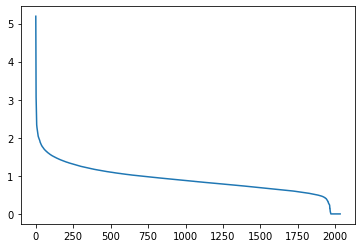

In [ ]:
plt.plot(S)

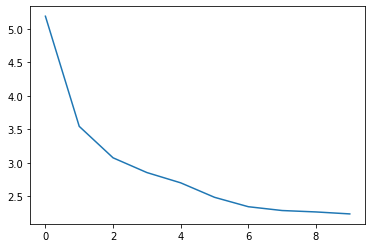

In [ ]:
plt.plot(S[:10])

In [ ]:

num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [ ]:
show_topics(Vh[:15])

['ditto critus collegue asg point_node n4 fiddled pnp',
 'space graphics thanks program files image nasa ftp',
 'space nasa launch shuttle moon orbit lunar station',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'objective think morality don just people moral values',
 'objective morality values moral god science space subjective',
 'graphics comp god software group objective aspects edu',
 'image file cview graphics data use just images',
 'jesus objective christ christian software christians bible did',
 'edu space jesus ftp file nasa files pub',
 'islam atheism islamic atheists religion muslims bobby evidence',
 'graphics group islam aspects context question code book',
 'space card vesa mode windows color vga driver',
 'just edu cview did objective mac context jim',
 'just thanks software objective real did values mary']